Imports Dependancies

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This is a dataset from kaggle that includes salary information of different data science roles since 2020

In [2]:
# Load the data
salaries = pd.read_csv('ds_salaries.csv')

Lets see a the shape of salary data

Text(0.5, 1.0, 'Histogram of Salaries')

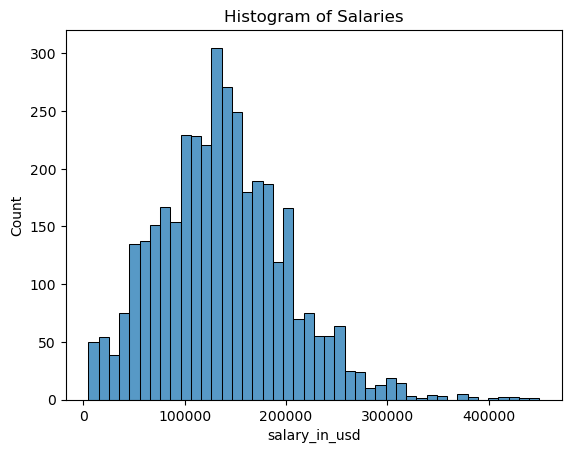

In [10]:
#creates a histogram of the salaries in usd
sns.histplot(salaries['salary_in_usd'], kde=False)
plt.title('Histogram of Salaries')

Lets see how average pay over time has changed

Text(0.5, 1.0, 'Salaries over time')

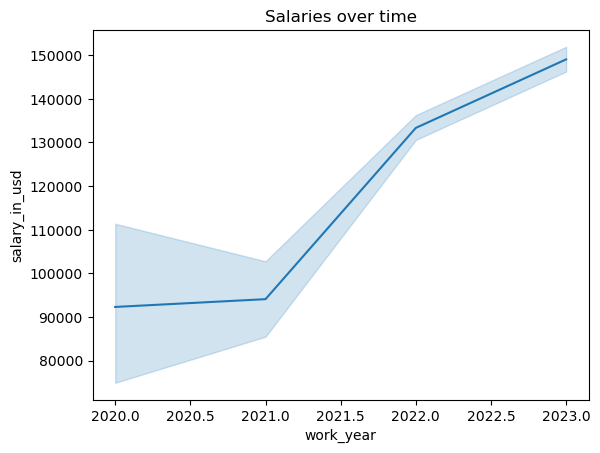

In [31]:
#creates a line plot of the salaries over time
sns.lineplot(data=salaries, x='work_year', y='salary_in_usd')
plt.title('Salaries over time')

Lets see which positions are the highest paying

In [42]:
titles_over_10 = salaries['job_title'].value_counts() > 10
titles_over_10 = titles_over_10[titles_over_10].index
salaries_over_10 = salaries[salaries['job_title'].isin(titles_over_10)]
salaries_by_title = salaries_over_10.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
salaries_by_title

job_title
Director of Data Science                    195140.727273
Data Science Manager                        191278.775862
Applied Scientist                           190264.482759
Machine Learning Scientist                  163220.076923
Research Engineer                           163108.378378
Data Architect                              161713.772277
Research Scientist                          161214.195122
ML Engineer                                 158352.441176
Machine Learning Engineer                   154690.726644
Analytics Engineer                          152368.631068
Computer Vision Engineer                    143536.111111
Machine Learning Infrastructure Engineer    143011.818182
Data Engineer                               142785.734615
Data Analytics Manager                      141879.090909
Data Scientist                              140869.765476
AI Developer                                136666.090909
BI Developer                                129846.153846
Data

Lets the count of the most popular titles over time

In [62]:
common_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer']
salaries_common = salaries[salaries['job_title'].isin(common_titles)]


Text(0.5, 1.0, 'Job Titles over time')

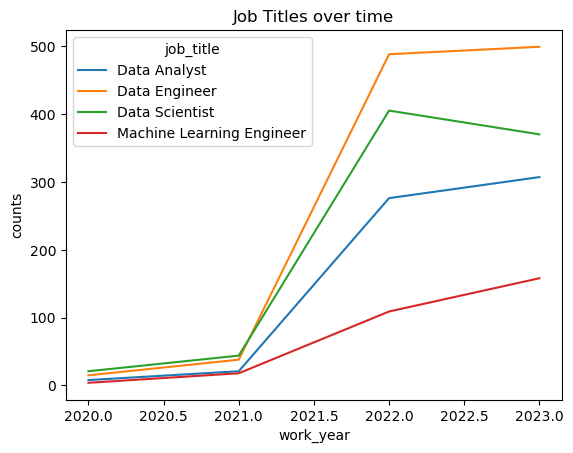

In [63]:
#creates a new datafram with work_year on the x-axis and count of job_title on the y-axis
salaries_by_year = salaries_common.groupby(['work_year', 'job_title']).size().reset_index(name='counts')
sns.lineplot(data=salaries_by_year, x='work_year', y='counts', hue='job_title')
plt.title('Job Titles count over time')


Lets see how experience effects compensation

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

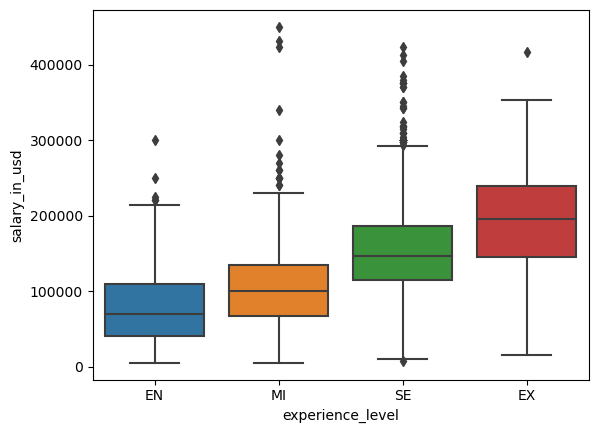

In [68]:
#plot experience_level vs salary_in_usd
sns.boxplot(data=salaries, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'])